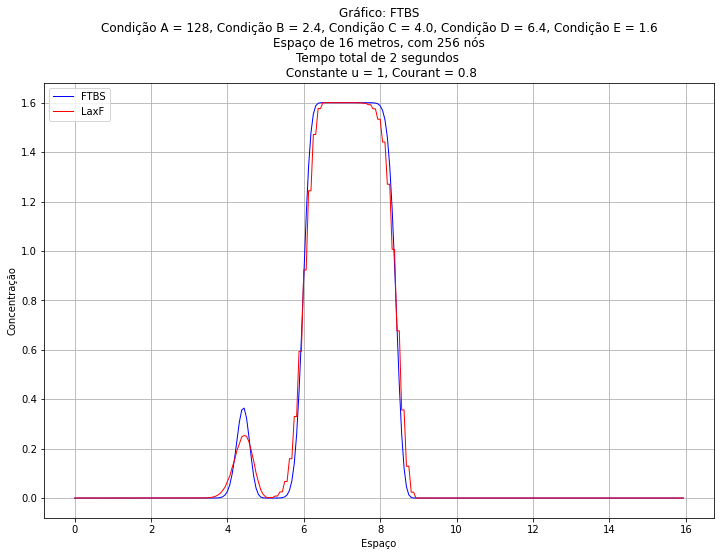

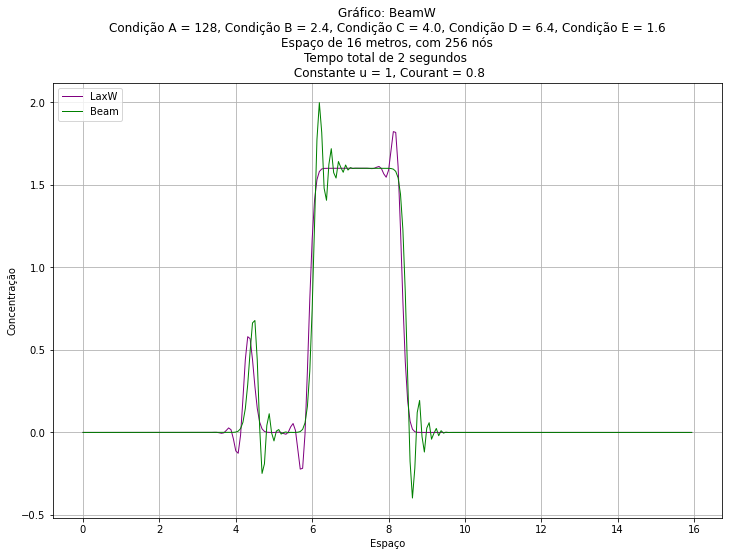

In [3]:
# -------------- Bibliotecas Utilizadas --------------

import matplotlib.pyplot as plt
import numpy as np

# -------------- Condições Iniciais --------------

condA = 128 # Entre 100 e 200
condB = 2.4 # Menor que C e D
condC = 4.0 # Menor que D
condD = 6.4 # Maior que C
condE = 1.6 # Entre 1 e 2

# -------------- Relações de tempo --------------

tempoTotal = 2 # Em segundos

# -------------- Relações de espaço --------------

espacoTotal = 16 # Maior que as condições
nosEspaco = 256 #Malha
deltaX = espacoTotal/nosEspaco

# -------------- Velocidade e Courant --------------

constanteU = 1 # Velocidade em m/s
numeroCourant = 0.8
deltaT = numeroCourant*deltaX/constanteU #DeltaT em função de Courant

# -------------- Vetores utilizados --------------

vetorEspaco = [0] * nosEspaco
for i in range(1, nosEspaco):
    vetorEspaco[i] = vetorEspaco[i-1] + deltaX

vetorAntigo = [0]* nosEspaco
vetorNovo = [0]* nosEspaco

# -------------- Cálculo geral de condições iniciais --------------

for i in range(0, nosEspaco):
    condInicial = np.exp(-condA*((vetorEspaco[i] - condB) ** 2))
    if condC <= vetorEspaco[i] <= condD:
        condInicial = condInicial + condE
        
    vetorNovo[i] = condInicial
    vetorAntigo[i] = condInicial

# -------------- Utilizado para confirmar vetores --------------

vetorAntigoPos = [0]* nosEspaco
vetorNovoPos = [0]* nosEspaco
    
for i in range (0, nosEspaco):
    vetorAntigoPos[i] = vetorAntigo[i]
    vetorNovoPos[i] = vetorNovo[i]

# -------------- Cálculo FTBS --------------

vetorAntigoFTBS = [0]* nosEspaco
vetorNovoFTBS = [0]* nosEspaco

for k in range (0, nosEspaco):
    vetorAntigoFTBS[k] = vetorAntigo[k]
    vetorNovoFTBS[k] = vetorNovo[k]

t = 0

while t < tempoTotal:
    #Contorno Esquerdo
    vetorNovoFTBS[0] = vetorAntigoFTBS[0]
    
    #Formulação FTBS
    for i in range(1,nosEspaco):
        vetorNovoFTBS[i] = vetorAntigoFTBS[i] - \
            (constanteU*deltaT/deltaX)*(vetorAntigoFTBS[i] - vetorAntigoFTBS[i-1])

    for j in range (0,nosEspaco):
        vetorAntigoFTBS[j] = vetorNovoFTBS[j]
        
    t+= deltaT

# -------------- Cálculo Lax-Friedrichs --------------

vetorAntigoLaxF = [0]* nosEspaco
vetorNovoLaxF = [0]* nosEspaco

for k in range (0, nosEspaco):
    vetorAntigoLaxF[k] = vetorAntigo[k]
    vetorNovoLaxF[k] = vetorNovo[k]
    
t = 0

while t < tempoTotal:
    # Cálculo de contorno esquerdo
    vetorNovoLaxF[0] = (vetorAntigoLaxF[1] + vetorAntigoLaxF[0])/2 - constanteU*deltaT/ \
        (2*deltaX)*(vetorAntigoLaxF[1] - vetorAntigoLaxF[0])
    
    #Formulação LaxF
    for i in range(1,nosEspaco-1):
        vetorNovoLaxF[i] = ((vetorAntigoLaxF[i+1] + \
            vetorAntigoLaxF[i-1])/2) - \
            (constanteU*deltaT/(2*deltaX))*(vetorAntigoLaxF[i+1] - vetorAntigoLaxF[i-1])
        
    # Cálculo de contorno direito
    vetorNovoLaxF[i] = (vetorAntigoLaxF[i] + vetorAntigoLaxF[i-1])/2 - \
        constanteU*deltaT/(2*deltaX)*(vetorAntigoLaxF[i] - vetorAntigoLaxF[i-1])
        
    for j in range (0,nosEspaco):
        vetorAntigoLaxF[j] = vetorNovoLaxF[j]
        
    t+= deltaT

# -------------- Cálculo Lax-Wendroff --------------

vetorAntigoLaxW = [0]* nosEspaco
vetorNovoLaxW = [0]* nosEspaco

for k in range (0, nosEspaco):
    vetorAntigoLaxW[k] = vetorAntigo[k]
    vetorNovoLaxW[k] = vetorNovo[k]
    
t = 0

while t < tempoTotal:
    #Cálculo do contorno esquerdo
    vetorNovoLaxW[0] = vetorAntigoLaxW[0] - constanteU*deltaT/(2*deltaX)* \
        (vetorAntigoLaxW[1] - vetorAntigoLaxW[0]) + (constanteU**2)*(deltaT**2)/ \
        (2*deltaX**2) * (vetorAntigoLaxW[1] - vetorAntigoLaxW[0])
    
    #Formulação LaxW
    for i in range(1,nosEspaco-1):
        vetorNovoLaxW[i] = vetorAntigoLaxW[i] - \
            ((constanteU*deltaT/deltaX)/2)*(vetorAntigoLaxW[i+1] - vetorAntigoLaxW[i-1]) + \
            (((constanteU*deltaT/deltaX)**2)/2) * (vetorAntigoLaxW[i+1] + vetorAntigoLaxW[i-1] - 2* vetorAntigoLaxW[i])

    #Cálculo do contorno direito
    vetorNovoLaxW[i] = vetorAntigoLaxW[i] - constanteU*deltaT/(2*deltaX)* \
        (vetorAntigoLaxW[i] - vetorAntigoLaxW[i-1]) + (constanteU**2)* \
        (deltaT**2)*(2*deltaX**2)*(vetorAntigoLaxW[i-1]-vetorAntigoLaxW[i])
    
    for j in range (0,nosEspaco):
        vetorAntigoLaxW[j] = vetorNovoLaxW[j]
        
    t+= deltaT

# -------------- Cálculo Beam-Warming --------------

vetorAntigoBeam = [0]* nosEspaco
vetorNovoBeam = [0]* nosEspaco

for k in range (0, nosEspaco):
    vetorAntigoBeam[k] = vetorAntigo[k]
    vetorNovoBeam[k] = vetorNovo[k]

t = 0

while t < tempoTotal:
    #Cálculo do contorno esquerdo (mesmo de LaxW)
    vetorNovoBeam[0] = vetorAntigoBeam[0] - constanteU*deltaT/(2*deltaX)* \
        (vetorAntigoBeam[1] - vetorAntigoBeam[0]) + (constanteU**2)*(deltaT**2)/ \
        (2*deltaX**2) * (vetorAntigoBeam[1] - vetorAntigoBeam[0])
    
    #Cálculo do volume que vem após o contorno esquerdo
    vetorNovoBeam[1] = vetorAntigoBeam[1] - 3*constanteU*deltaT/(2*deltaX)* \
        (vetorAntigoBeam[1] - vetorAntigoBeam[0]) + (constanteU**2)*(deltaT**2)/ \
        (2*deltaX**2) * (vetorAntigoBeam[1] - vetorAntigoBeam[0])
    
    #Formulação BeamW
    for i in range(2,nosEspaco):
        vetorNovoBeam[i] = vetorAntigoBeam[i] - \
            ((constanteU*deltaT/deltaX)/2) * (3*vetorAntigoBeam[i] - 4*vetorAntigoBeam[i-1] + vetorAntigoBeam[i-2]) + \
            ((constanteU*deltaT/deltaX)**2) / 2*(vetorAntigoBeam[i] - 2*vetorAntigoBeam[i-1] + vetorAntigoBeam[i-2])
    
    for j in range (0,nosEspaco):
        vetorAntigoBeam[j] = vetorNovoBeam[j]
        
    t+= deltaT

# -------------- Verificando os vetores iniciais (não devem alterar) --------------

for i in range (0,nosEspaco):
    if(vetorNovoPos[i] != vetorNovo[i] or vetorAntigoPos[i] != vetorAntigo[i]):
        print("Erro!")

# -------------- Passagem de variáveis para string --------------

condATexto = "Condição A = " + str(condA)
condBTexto = ", Condição B = " + str(condB)
condCTexto = ", Condição C = " + str(condC)
condDTexto = ", Condição D = " + str(condD)
condETexto = ", Condição E = " + str(condE)

espacoTotalTexto = str(espacoTotal) + " metros, com "
nosEspacoTexto = str(nosEspaco) + " nós"

tempoTotalTexto = str(tempoTotal) + " segundos "

constanteUTexto = "u = " + str(constanteU)
numeroCourantTexto = ", Courant = " + str(numeroCourant)

# -------------- Plot FTBS e LaxF --------------

plt.figure(figsize=(12,8))
plt.grid()
plt.xlabel('Espaço')
plt.ylabel('Concentração')
plt.title('Gráfico: FTBS\n' + condATexto + condBTexto + condCTexto + condDTexto + condETexto + "\nEspaço de " \
          + espacoTotalTexto + nosEspacoTexto + "\nTempo total de " + tempoTotalTexto + \
         "\n Constante " + constanteUTexto + numeroCourantTexto)
plt.plot(vetorEspaco, vetorNovoFTBS, label='FTBS',linewidth=1, color='blue')
plt.plot(vetorEspaco, vetorNovoLaxF, label='LaxF',linewidth=1, color='red')
plt.legend(loc="upper left")
plt.show()

# -------------- Plot LaxW e Beam --------------

plt.figure(figsize=(12,8))
plt.grid()
plt.xlabel('Espaço')
plt.ylabel('Concentração')
plt.title('Gráfico: BeamW\n' + condATexto + condBTexto + condCTexto + condDTexto + condETexto + "\nEspaço de " \
          + espacoTotalTexto + nosEspacoTexto + "\nTempo total de " + tempoTotalTexto + \
         "\n Constante " + constanteUTexto + numeroCourantTexto)
plt.plot(vetorEspaco, vetorNovoLaxW, label='LaxW',linewidth=1, color='purple')
plt.plot(vetorEspaco, vetorNovoBeam, label='Beam',linewidth=1, color='green')
plt.legend(loc="upper left")
plt.show()